### Firts import

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from matplotlib.colors import ListedColormap
import sklearn.metrics as metrics
import sklearn
from sklearn import preprocessing

1. Choose a dataset (1 point)

a) Find an open-source dataset to complete the complete the project. Provide the link
and the author of the dataset. Explain it.

    Link: https://www.kaggle.com/datasets/ppb00x/credit-risk-customers

    Author: Spear> https://www.kaggle.com/ppb00x


b) Why is it an appropriate dataset? Does it require any modification or adaptation to
be used?

    This dataset contains a variety of features that would allow us to classify and use KNN and SVM models and observe the impacts of different features on the credit risk. In the first place no huge adaptation is needed.

c) Justify why that dataset is selected. What are your interests related to this data?

    Assessing credit risk and factors that may contribute to it, is relevant and crucial knowledge. That is important to understand for every individual, and therefore choosing this dataset is practical and it inherently implies the potential real life application.

d) Provide your own objectives for the project.


    Understanding the key factors that contribute to credit risk is crucial in order to  correctly assess the               creditworthiness. This analysis could provide insights into patterns and trends that affect credit risk.
   

e) Provide some questions (minimum 5) that you want to answer as soon as you have
finished the study.



In [3]:
df = pd.read_csv('credit_customers.csv')
df.sample()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
150,no checking,6.0,existing paid,radio/tv,1346.0,100<=X<500,>=7,2.0,male single,none,...,no known property,42.0,bank,for free,1.0,skilled,2.0,yes,yes,good


Visualization and exploring

In [4]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [6]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

<AxesSubplot:>

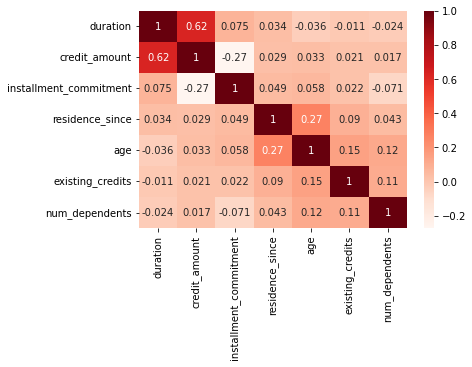

In [9]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)

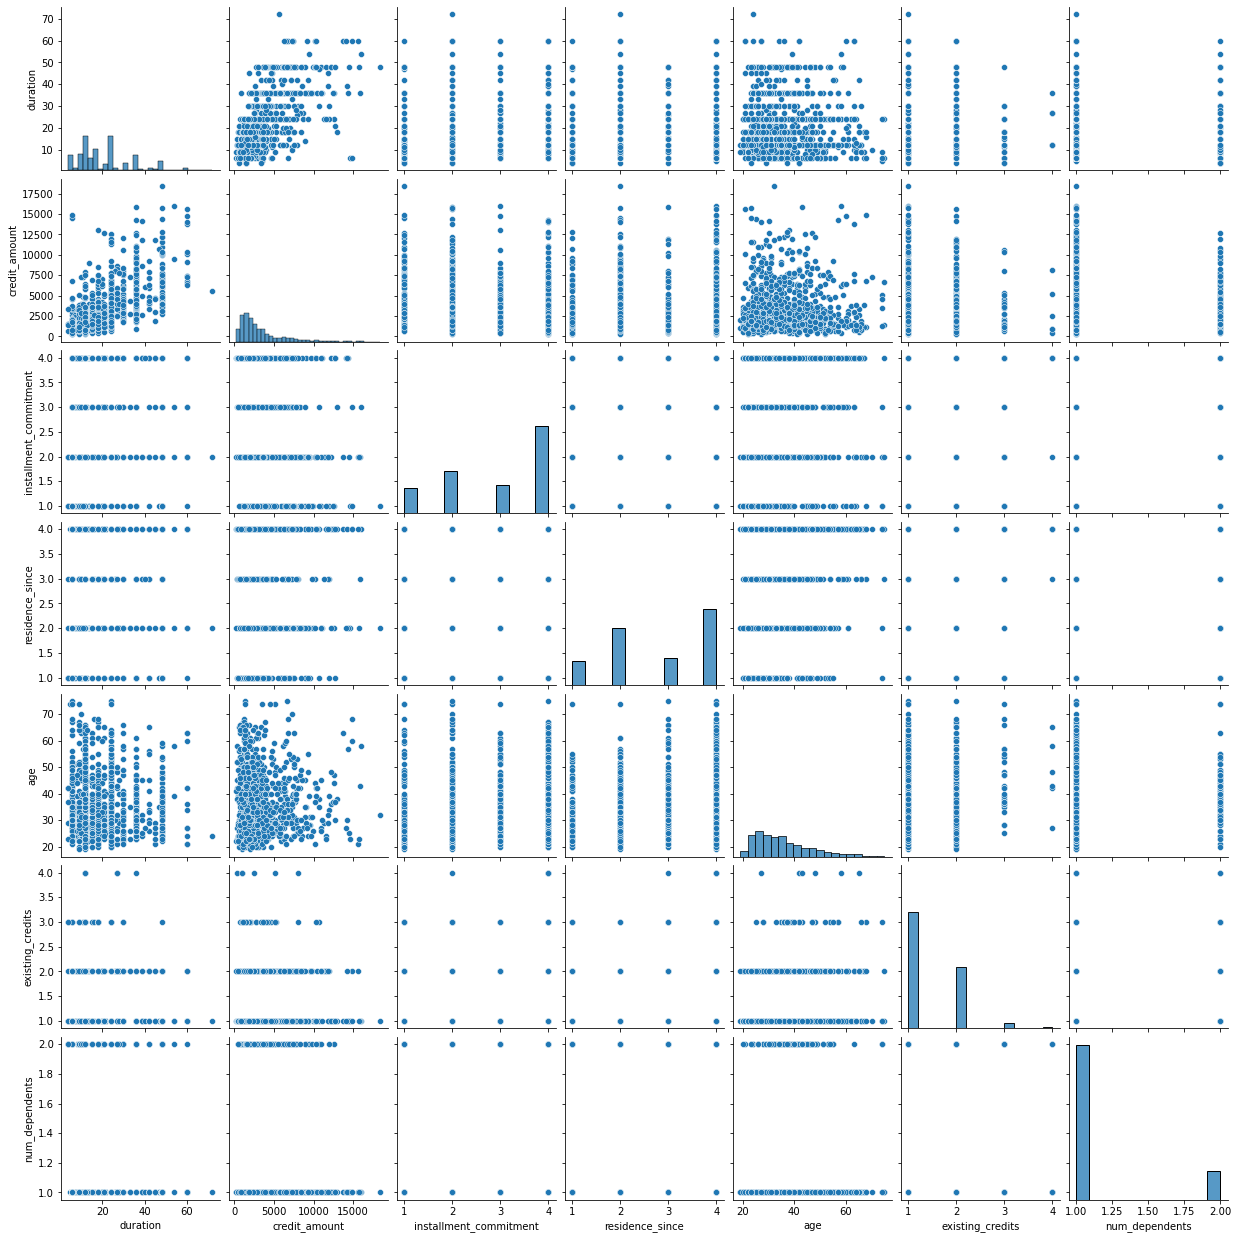

In [10]:
sns.pairplot(df, diag_kind='hist')

In [11]:
def categorical_variables(df):
    for columns in df.columns:
        if df[columns].dtype == 'object':
            print(columns)
            print(df[columns].unique())
            print('\n')

categorical_variables(df)

checking_status
['<0' '0<=X<200' 'no checking' '>=200']


credit_history
['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']


purpose
['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']


savings_status
['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']


employment
['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']


personal_status
['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']


other_parties
['none' 'guarantor' 'co applicant']


property_magnitude
['real estate' 'life insurance' 'no known property' 'car']


other_payment_plans
['none' 'bank' 'stores']


housing
['own' 'for free' 'rent']


job
['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']


own_telephone
['yes' 'none']


foreign_worker
['yes' 'no']


class
['good' 'bad']




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

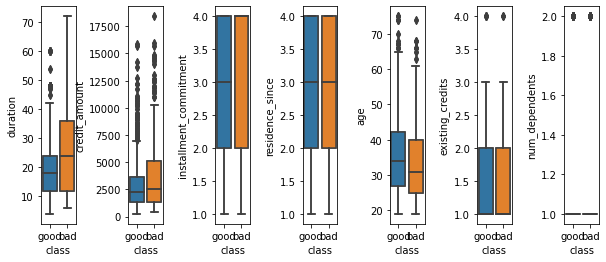

In [13]:
target = 'class'
features = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

fig, ax = plt.subplots(1, len(features), figsize=(10,4))
fig.subplots_adjust(wspace=1.5)

for i, ax in enumerate(ax.flat):
    sns.boxplot(data=df, x=target, y=features[i], ax=ax)
    sns.boxplot(data=df, x=target, y=features[i], ax=ax)
    

In [14]:
df.groupby('class').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
class,,,,,,,
bad,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333
good,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714


### Transformation

In [15]:
# new_df = df[['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents','class']]

# y = new_df['class']
# X = new_df.drop('class', axis=1)

# new_df.head()

### First definition - Numerical Categorical and Target

In [16]:
y = pd.get_dummies(df['class'],drop_first=True).rename(columns = {'good':'class'})
X_categorical = df.drop('class', axis = 1).select_dtypes(include=['object'])
X_numerical = df.drop('class', axis = 1).select_dtypes(include=['float64', 'int64'])

In [17]:
X_categorical = X_categorical[['checking_status', 'credit_history', 'employment', 'other_parties', 'property_magnitude', 'housing']]
X_numerical = X_numerical.drop(['installment_commitment', 'residence_since','num_dependents'], axis=1) #['duration', 'credit_amount',  'age', ]

In [18]:
print(y.shape)
print(X_categorical.shape)
print(X_numerical.shape)
print('Columns:', len(X_categorical.columns) + len(X_numerical.columns))

(1000, 1)
(1000, 6)
(1000, 4)
Columns: 10


Categorical Variables

In [19]:
# encoder = sklearn.preprocessing.OrdinalEncoder(categories=[])
# encoder.fit(X_categorical)
# encoder.transform(X_categorical)

In [20]:
def Categorical_encoding_dicts():    
    checking_status = {'<0' : 1, '0<=X<200': 2, 'no checking' : 0, '>=200' :3}
    credit_history = {'critical/other existing credit':0, 'existing paid' : 2, 'delayed previously':1,
    'no credits/all paid' :3 ,'all paid':4}

    purposes = {}

    savings = {'no known savings' : 0, '<100':1, '500<=X<1000':3, '>=1000':4, '100<=X<500':2}
    employment = {'>=7':4, '1<=X<4':2, '4<=X<7':3, 'unemployed':0, '<1':1}

    personal_status = {}

    other_parties = {'none':0, 'guarantor':1, 'co applicant':2}
    property_magnitude ={'real estate':3, 'life insurance':2, 'no known property':0, 'car':1}

    other_payment_plans ={}

    housing = {'own':2, 'for free':1, 'rent':0} # This may be controversial
    job = {'skilled':2, 'unskilled resident': 1, 'high qualif/self emp/mgmt':3,
    'unemp/unskilled non res': 0}
    own_telephone = {}
    foreign_worker= {}

In [21]:
merged_dict = {
    '<0': 1,
    '0<=X<200': 2,
    'no checking': 0,
    '>=200': 3,
    'critical/other existing credit': 0,
    'existing paid': 2,
    'delayed previously': 1,
    'no credits/all paid': 3,
    'all paid': 4,
    'purposes': {},
    'no known savings': 0,
    '<100': 1,
    '500<=X<1000': 3,
    '>=1000': 4,
    '100<=X<500': 2,
    '>=7': 4,
    '1<=X<4': 2,
    '4<=X<7': 3,
    'unemployed': 0,
    '<1': 1,
    'personal_status': {},
    'none': 0,
    'guarantor': 1,
    'co applicant': 2,
    'real estate': 3,
    'life insurance': 2,
    'no known property': 0,
    'car': 1,
    'other_payment_plans': {},
    'own': 2,
    'for free': 1,
    'rent': 0,
    'skilled': 2,
    'unskilled resident': 1,
    'high qualif/self emp/mgmt': 3,
    'unemp/unskilled non res': 0,
    'own_telephone': {'yes':1, 'no':0},
    'foreign_worker': {}
}

In [22]:
a = X_categorical
for columns in a.columns:
    print(columns)
    X_categorical[columns] = X_categorical[columns].map(merged_dict)

X_categorical = X_categorical.dropna(axis=1).astype(float)

checking_status
credit_history
employment
other_parties
property_magnitude
housing


Numerical Variables

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_columns = X_numerical.columns
X_numerical = pd.DataFrame(scaler.fit_transform(X_numerical))
X_numerical.columns = x_columns


In [24]:
X = pd.concat([pd.DataFrame(X_numerical), X_categorical], axis=1).dropna(axis=1)

##### Visualize the transformation

In [25]:
df_new = y.join(X)
df_new.corr()['class']

class                 1.000000
duration             -0.214927
credit_amount        -0.154739
age                   0.091127
existing_credits      0.045732
checking_status      -0.197788
credit_history       -0.225877
employment            0.116002
other_parties        -0.028441
property_magnitude    0.142612
housing               0.123815
Name: class, dtype: float64

Numerical

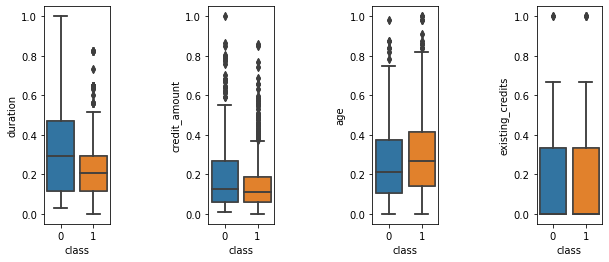

In [26]:
target = 'class'
features = X_numerical.columns


fig, ax = plt.subplots(1, len(features), figsize=(10,4))
fig.subplots_adjust(wspace=1.5)

for i, ax in enumerate(ax.flat):
    sns.boxplot(data=df_new, x=target, y=features[i], ax=ax)
    sns.boxplot(data=df_new, x=target, y=features[i], ax=ax)

Categorical

,checking_status,credit_history,employment,other_parties,property_magnitude,housing
class,,,,,,
0,1.290000,1.843333,2.170000,0.153333,1.413333,1.386667
1,0.877143,1.301429,2.475714,0.125714,1.740000,1.597143


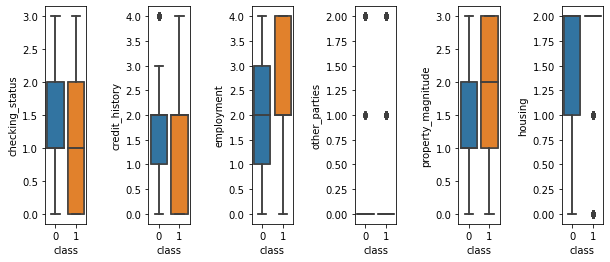

In [27]:
target = 'class'
features = X_categorical.columns


fig, ax = plt.subplots(1, len(features), figsize=(10,4))
fig.subplots_adjust(wspace=1.5)

for i, ax in enumerate(ax.flat):
    sns.boxplot(data=df_new, x=target, y=features[i], ax=ax)
    sns.boxplot(data=df_new, x=target, y=features[i], ax=ax)

df_new.groupby('class')[features].mean()


Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30, test_size = 0.2)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# lr = KNeighborsClassifier()
# lr.fit(X_train, y_train)
knn_neighbors = [1,3,5,7,9]
knn_weights = ['uniform', 'distance' ]
param = [{'n_neighbors': knn_neighbors,
         'weights': knn_weights}]

print(type(param[0]))


<class 'dict'>


In [30]:
# Define the grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_gridSearch = GridSearchCV(KNeighborsClassifier(),
                            param_grid = param,
                            scoring = "accuracy",
                            cv = 4)
print((param[0]['n_neighbors']))

[1, 3, 5, 7, 9]


In [31]:
knn_gridSearch.fit(X_train, y_train)

e:\Programing\anaconda\vprogram\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\Programing\anaconda\vprogram\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\Programing\anaconda\vprogram\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\Programing\anaconda\vprogram\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [32]:
#Results
model_result = knn_gridSearch.cv_results_['mean_test_score'].\
reshape(len(knn_neighbors),len(knn_weights))
print(model_result)

[[0.67125 0.67125]
 [0.69625 0.68125]
 [0.715   0.69875]
 [0.71125 0.7025 ]
 [0.70875 0.70375]]


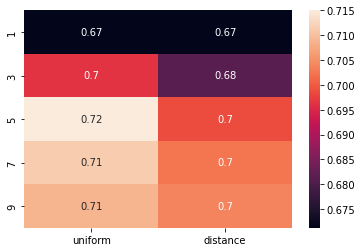

In [33]:
#Visualizations
sns.heatmap(model_result, annot = True, xticklabels = knn_weights, yticklabels = knn_neighbors)
plt.show()

In [34]:
best_param = knn_gridSearch.best_params_
print('Best parameters are: \n\t - k = '
     +str(best_param['n_neighbors'])
     + '\n\t - Weight = '
     +str(best_param['weights']))

Best parameters are: 
	 - k = 5
	 - Weight = uniform


In [35]:
knn_model = KNeighborsClassifier(n_neighbors=best_param['n_neighbors'],\
                                weights=best_param['weights']).\
                                fit(X_train, y_train)

e:\Programing\anaconda\vprogram\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
predict = knn_model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

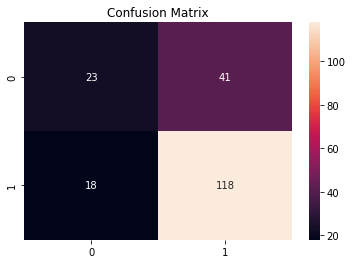

In [38]:
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [39]:
print('Precision = ' +
     str(knn_model.score(X_test, y_test) * 100) +
     '%')

Precision = 70.5%


In [40]:
# cm[0,0]/(cm[0,1]+cm[0,0])

In [41]:
print('Accuracy', metrics.accuracy_score(y_test, predict)) 
print('Precision score: ', metrics.precision_score(y_test, predict), '\t --> Positive Predicted value')
print('Recall Score: ', metrics.recall_score(y_test, predict), '\t --> Sensitivity or true positive rate')

Accuracy 0.705
Precision score:  0.7421383647798742 	 --> Positive Predicted value
Recall Score:  0.8676470588235294 	 --> Sensitivity or true positive rate
